In [1]:
import pandas as pd

# Load your fraud dataset

fraud_data = pd.read_csv('C:/Users/1234/Downloads/Fraud_check.csv')

# Display the first few rows of the dataset to understand its structure
print(fraud_data.head())


  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [2]:
# Check for missing values
print(fraud_data.isnull().sum())

# Drop duplicates if any
fraud_data = fraud_data.drop_duplicates()

# Handle missing values if necessary (impute or drop)
# For example:
# fraud_data = fraud_data.dropna()

# Check the updated dataset
print(fraud_data.head())


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64
  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [5]:
# Treat Taxable_Income <= 30000 as "Risky" and others as "Good"
fraud_data['Taxable_Income_Category'] = pd.cut(fraud_data['Taxable.Income'],
                                               bins=[-float('inf'), 30000, float('inf')],
                                               labels=['Risky', 'Good'])

# Drop the original 'Taxable_Income' column
fraud_data.drop('Taxable.Income', axis=1, inplace=True)

# Encode categorical variables using one-hot encoding
fraud_data_encoded = pd.get_dummies(fraud_data, columns=['Undergrad','Marital.Status','Urban'])

# Check the updated dataset
print(fraud_data_encoded.head())


   City.Population  Work.Experience Taxable_Income_Category  Undergrad_NO  \
0            50047               10                    Good          True   
1           134075               18                    Good         False   
2           160205               30                    Good          True   
3           193264               15                    Good         False   
4            27533               28                    Good          True   

   Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0          False                    False                   False   
1           True                     True                   False   
2          False                    False                    True   
3           True                    False                   False   
4          False                    False                    True   

   Marital.Status_Single  Urban_NO  Urban_YES  
0                   True     False       True  
1                  False  

In [6]:
from sklearn.model_selection import train_test_split

X = fraud_data_encoded.drop('Taxable_Income_Category', axis=1)
y = fraud_data_encoded['Taxable_Income_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

        Good       0.77      0.94      0.85        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.39      0.47      0.42       120
weighted avg       0.60      0.73      0.66       120


Confusion Matrix:
 [[88  6]
 [26  0]]


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

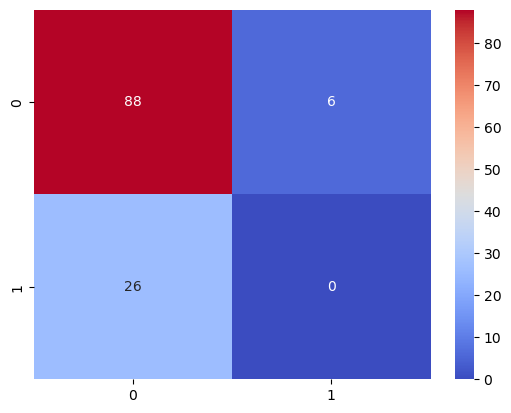

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'coolwarm')
plt.show()